In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import itertools
import time
from datetime import datetime

In [21]:
#reading in data
hotels = pd.read_csv('Hotel Reservations.csv')
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [22]:
# Mapping response to 0 (Not Canceled) and 1 (Canceled)
hotels['booking_status'].replace(['Canceled', 'Not_Canceled'],[0, 1], inplace=True)

In [23]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


In [24]:
# Split train and test datasets
y = hotels.booking_status
X = hotels.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)
train, test = train_test_split(hotels, test_size=0.25, random_state=25, shuffle=True, stratify=y)

# Developing Baseline Model

In [25]:
# forward error - try fixing the error
# compare number of 1 and 0 in test dataset and that predicted by the model
# This baseline model is all the predictors so we will try to manipulate it - yes can do interaction
    # Justify the interaction with the variable selection methods
    # Variable selection is a good place to start


In [40]:
#Baseline model
baseline_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+no_of_week_nights+\
type_of_meal_plan+required_car_parking_space+room_type_reserved+lead_time+arrival_year+\
arrival_month+arrival_date+market_segment_type+repeated_guest+no_of_previous_cancellations+\
no_of_previous_bookings_not_canceled+avg_price_per_room+no_of_special_requests', data = train).fit()
baseline_model.summary()

         Current function value: 0.422790
         Iterations: 35


/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27178
Method:                           MLE   Df Model:                           27
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3316
Time:                        15:51:01   Log-Likelihood:                -11502.
converged:                      False   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             1020.6833    118.165      8.638      0.000     789.083    1252.283
type_of_meal_plan[T.Meal Plan 2]        -0.1426      0.065     -2.196      0.028      -0.270      -0.015
type_of_meal_plan[T.Meal Plan 3]       -30.3389   2.54e+06  -1.19e-05      1.000   -4.98e+06    4.98e+06
type_of_meal_plan[T.Not Selected]       -0.2033      0.051     -3.970      0.000      -0.304      -0.103
room_type_reserved[T.Room_Type 2]        0.3762      0.127      2.953      0.003       0.126       0.626
room_type_reserved[T.Room_Type 3]        0.2561      1.362      0.188      0.851      -2.414       2.926
room_type_reserved[T.Room_Type 4]        0.2663      0.052      5.155      0.000       0.165       0.367
room_type_reserved[T.Room_Type 5]        0.6286      0.199      3.163      0.002       0.239       1.018
room_type_reserved[T.Room_Type 6]        0.7886      0.145      5.438      0.000       0.504       1.073
room_type_reserved[T.Room_Type 7]        1.5009      0.307      4.887      0.000       0.899       2.103
market_segment_type[T.Complementary]    49.8044   2.54e+06   1.96e-05      1.000   -4.98e+06    4.98e+06
market_segment_type[T.Corporate]         1.2619      0.253      4.985      0.000       0.766       1.758
market_segment_type[T.Offline]           2.1832      0.242      9.039      0.000       1.710       2.657
market_segment_type[T.Online]            0.4034      0.239      1.691      0.091      -0.064       0.871
no_of_adults                            -0.0668      0.036     -1.844      0.065      -0.138       0.004
no_of_children                          -0.1104      0.058     -1.911      0.056      -0.224       0.003
no_of_weekend_nights                    -0.1375      0.019     -7.175      0.000      -0.175      -0.100
no_of_week_nights                       -0.0420      0.012     -3.546      0.000      -0.065      -0.019
required_car_parking_space               1.5982      0.135     11.832      0.000       1.333       1.863
lead_time                               -0.0155      0.000    -60.531      0.000      -0.016      -0.015
arrival_year                            -0.5046      0.059     -8.618      0.000      -0.619      -0.390
arrival_month                            0.0372      0.006      5.938      0.000       0.025       0.049
arrival_date                            -0.0019      0.002     -0.987      0.323      -0.006       0.002
repeated_guest                           2.0632      0.477      4.329      0.000       1.129       2.997
no_of_previous_cancellations            -0.2248      0.068     -3.325      0.001      -0.357      -0.092
no_of_previous_bookings_not_canceled     0.0811      0.088      0.919      0.358      -0.092       0.254
avg_price_per_room                      -0.0183      0.001    -25.698      0.000      -0.020      -0.017
no_of_special_requests                   1.4974      0.029     51.063      0.000       1.44

In [59]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

In [72]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_accuracy(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    return accuracy

0.8098213629346468 0.54


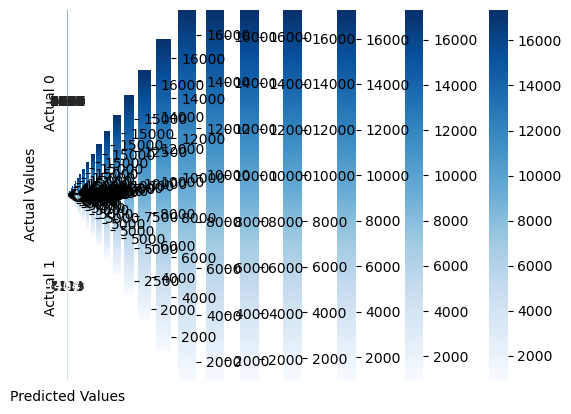

In [74]:
#Calculating best model accuracy and best cutoff 
best_accuracy = 0
best_cutoff = None

for cutoff in range(35,70):
    cutoff = cutoff / 100
    accuracy = confusion_matrix_accuracy(train, train.booking_status, baseline_model, cutoff = cutoff)
    
    if(accuracy >= best_accuracy):
        best_accuracy = accuracy
        best_cutoff = cutoff
        
print(best_accuracy, best_cutoff)

Classification accuracy = 81.0%
Precision = 84.6%
TPR or Recall = 87.6%
FNR = 12.4%
FPR = 32.6%
ROC-AUC = 86.4%


0.8098213629346468

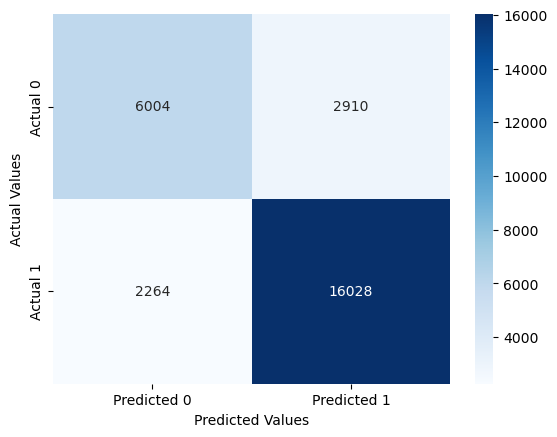

In [67]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model, cutoff = 0.54)

0.8098213629346468

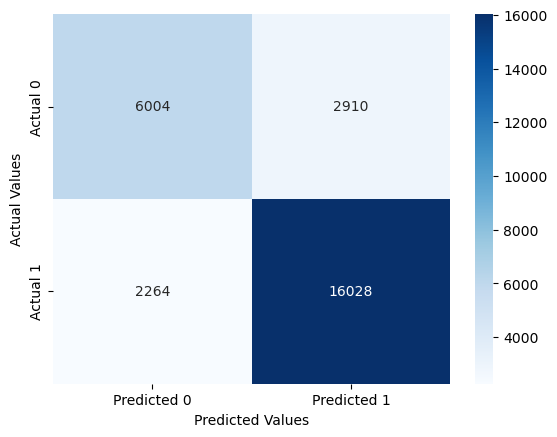

In [73]:
confusion_matrix_accuracy(train, train.booking_status, baseline_model, cutoff = 0.54)

# Dummy Variables

In [ ]:
# playing without dummy - use the original data instead of dummy

In [46]:
# Convert categorical variables to dummies and append to df 
dummy_market = pd.get_dummies(hotels.market_segment_type)
dummy_month = pd.get_dummies(hotels.arrival_month)
dummy_meal = pd.get_dummies(hotels.type_of_meal_plan)
dummy_room = pd.get_dummies(hotels.room_type_reserved)

hotels_dummy = pd.concat([hotels, dummy_market.drop('Aviation', axis = 1), dummy_month.drop(4, axis = 1), dummy_meal.drop('Meal Plan 3', axis = 1), dummy_room.drop('Room_Type 7', axis = 1)], axis = 1)
hotels_dummy.columns = hotels_dummy.columns.astype(str)
hotels_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,12,Meal Plan 1,Meal Plan 2,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [49]:
# Split train and test datasets with dummies
y = hotels_dummy.booking_status
X = hotels_dummy.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)
train, test = train_test_split(hotels_dummy, test_size=0.25, random_state=25, shuffle=True, stratify=y)

In [117]:
#extracting 2017 arrivals
svnteen_train = train[train['arrival_year'] == 2017]

svnteen_date = svnteen_train.groupby(hotels.date)
#extracting 2018 arrivals 
eiteen_train = train[train['arrival_year'] == 2018]

In [118]:
# Logistic regression model with dummy variables 
logit_model = sm.logit('booking_status~no_of_special_requests+lead_time+no_of_weekend_nights+\
no_of_weekend_nights*no_of_week_nights+no_of_previous_cancellations+\
no_of_previous_cancellations*no_of_previous_bookings_not_canceled+\
avg_price_per_room+avg_price_per_room*no_of_adults+avg_price_per_room*no_of_children', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.466366
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2627
Time:                        00:41:22   Log-Likelihood:                -12688.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             5.3143      0.219     24.243      0.000       4.885       5.744
no_of_special_requests                                                1.1224      0.025     44.296      0.000       1.073       1.172
lead_time                                                            -0.0127      0.000    -60.848      0.000      -0.013      -0.012
no_of_weekend_nights                                                 -0.0697      0.029     -2.409      0.016      -0.126      -0.013
no_of_week_nights                                                     0.0221      0.018      1.252      0.211      -0.012       0.057
no_of_weekend_nights:no_of_week_nights                               -0.0453      0.008     -5.757      0.000      -0.061      -0.030
no_of_previous_cancellations                                         -0.0070      0.070     -0.101      0.920      -0.144       0.130
no_of_previous_bookings_not_canceled                                  0.6133      0.174      3.522      0.000       0.272       0.955
no_of_previous_cancellations:no_of_previous_bookings_not_canceled    -0.0501      0.021     -2.393      0.017      -0.091      -0.009
avg_price_per_room                                                   -0.0327      0.002    -17.483      0.000      -0.036      -0.029
no_of_adults                                                         -0.9304      0.108     -8.596      0.000      -1.143      -0.718
avg_price_per_room:no_of_adults                                       0.0065      0.001      7.298      0.000       0.005       0.008
no_of_children                                                       -0.7589      0.121     -6.252      0.000      -0.997      -0.521
avg_price_per_room:no_of_children                                     0.0049      0.001      6.547      0.000       0.003       0.006
=====================================================================================================================================
"""

In [121]:
predictions_17 = logit_model.predict(svnteen_train)
#predictions_17 = (predictions_17>best_cutoff).astype(int)
predictions_17

549      0.729008
24662    0.102562
28933    0.450126
34900    0.900384
5012     0.581289
           ...   
19403    0.815915
32857    0.812025
27416    0.846245
32819    0.890258
31659    0.699469
Length: 4842, dtype: float64

<AxesSubplot: ylabel='booking_status'>

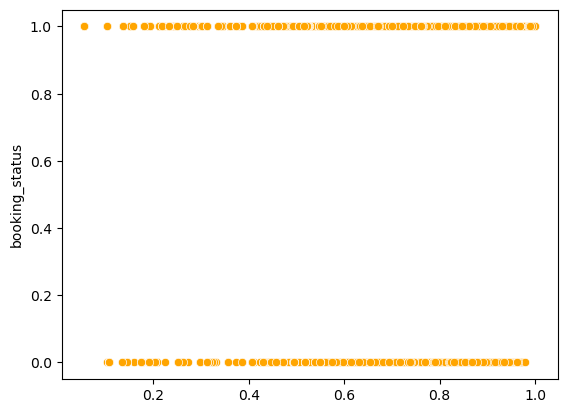

In [122]:
sns.scatterplot(x=predictions_17, y=svnteen_train.booking_status, color="orange")
#I really think I'm graphing this wrong or approaching this the wrong way
#Next steps: graph time on X and residuals on y... but does graphing residuals of a binary response make sense??

In [115]:
cols=[hotels.arrival_year, hotels.arrival_month, hotels.arrival_date]
hotels['date'] = hotels.apply(lambda x: str(x.arrival_year) + "-" + str(x.arrival_month) + "-" + str(x.arrival_date), axis="columns")
hotels['date']=pd.to_datetime(hotels['date'], infer_datetime_format = True, errors="coerce")